In [33]:
from datetime import datetime
import pandas as pd
import numpy as np


# Model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix



from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt

import gzip
import glob
import json

import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats as ss

import matplotlib.pyplot as plt

from collections import Counter
%matplotlib inline
run_title = "baseline"

plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [13]:
train = pd.read_csv("train.csv")
train

,tweet_id,priority,score_std,score_k,category,event_id,identifier,description,informationTypes
0,211281973870727170,0.25,0.0,1,Irrelevant,11.0,TRECIS-ITR-H-Types-v4-T1,TREC-IS Incident Tweet Routing (High-Level) In...,"{'id': 'report-newsubevent', 'desc': 'the user..."
1,211557401231495171,0.50,0.0,1,FirstPartyObservation,8.0,TRECIS-ITR-H-Types-v4-T1,TREC-IS Incident Tweet Routing (High-Level) In...,"{'id': 'report-weather', 'desc': 'the user is ..."
2,211565974422425600,0.75,0.0,1,ServiceAvailable,19.0,TRECIS-ITR-H-Types-v4-T1,TREC-IS Incident Tweet Routing (High-Level) In...,"{'id': 'report-originalevent', 'desc': ""a repo..."
3,211607187653533697,0.50,0.0,1,Weather,22.0,TRECIS-ITR-H-Types-v4-T1,TREC-IS Incident Tweet Routing (High-Level) In...,"{'id': 'other-sentiment', 'desc': 'the post is..."
4,211654415503990784,0.50,0.0,1,News,15.0,TRECIS-ITR-H-Types-v4-T1,TREC-IS Incident Tweet Routing (High-Level) In...,"{'id': 'report-official', 'desc': 'an official..."
...,...,...,...,...,...,...,...,...,...
1330,396336012726525952,0.25,0.0,1,News,15.0,TRECIS-ITR-H-Types-v4-T1,TREC-IS Incident Tweet Routing (High-Level) In...,"{'id': 'report-official', 'desc': 'an official..."
1331,396336079856345088,0.25,0.0,1,News,15.0,TRECIS-ITR-H-Types-v4-T1,TREC-IS Incident Tweet Routing (High-Level) In...,"{'id': 'report-official', 'desc': 'an official..."
1332,396336243442589696,0.25,0.0,1,News,15.0,TRECIS-ITR-H-Types-v4-T1,TREC-IS Incident Tweet Routing (High-Level) In...,"{'id': 'report-official', 'desc': 'an official..."
1333,396336297968562176,0.25,0.0,1,Factoid,7.0,TRECIS-ITR-H-Types-v4-T1,TREC-IS Incident Tweet Routing (High-Level) In...,"{'id': 'report-thirdpartyobservation', 'desc':..."


In [ ]:
train

In [15]:
# Reload the data to check everythings went alright
test = pd.read_csv("feature_vec.csv")

# Timestamp will need to be reconfigured as index on each load
test = test.set_index('timestamp')
test

,tweet_id,positive_sentiment,negative_sentiment,numb_of_mentions,numb_of_urls,numb_of_hashtagsnumb_of_personal_pronouns,numb_of_present_tenses,numb_of_past_tenses,sent_from_web,numb_of_weird_chars,...,numb_of_intensifiers,tweet_length,userFollowersCount,userFriendsCount,user_numb_of_tweets,user_list_count,tfidf_fire,dict_precision,dict_recall,dict_f_measure
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-08-06 15:31:49,1.158763e+18,3.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,68.0,1592.0,523.0,0.0,94.0,0.0,20.000000,11.110000,14.290000
2019-08-06 15:28:06,1.158762e+18,9.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,70.0,33.0,0.0,0.0,4.0,0.0,16.670000,11.110000,13.330000
2019-08-06 15:21:11,1.158760e+18,5.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,57.0,220.0,61.0,0.0,3.0,0.0,33.330002,22.219999,26.670000
2019-08-06 15:18:46,1.158759e+18,7.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,80.0,106.0,124.0,0.0,0.0,0.0,22.219999,22.219999,22.219999
2019-08-06 15:17:58,1.158759e+18,3.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,57.0,550.0,720.0,0.0,7.0,0.0,14.290000,11.110000,12.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-05 17:39:12,1.158432e+18,5.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,93.0,303.0,1465.0,0.0,11.0,0.0,11.110000,11.110000,11.110000
2019-08-05 17:36:34,1.158432e+18,14.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,92.0,51.0,272.0,0.0,4.0,0.0,0.000000,0.000000,0.000000
2019-08-05 17:21:12,1.158428e+18,3.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,256.0,382.0,16.0,0.0,4.0,0.0,0.000000,0.000000,0.000000


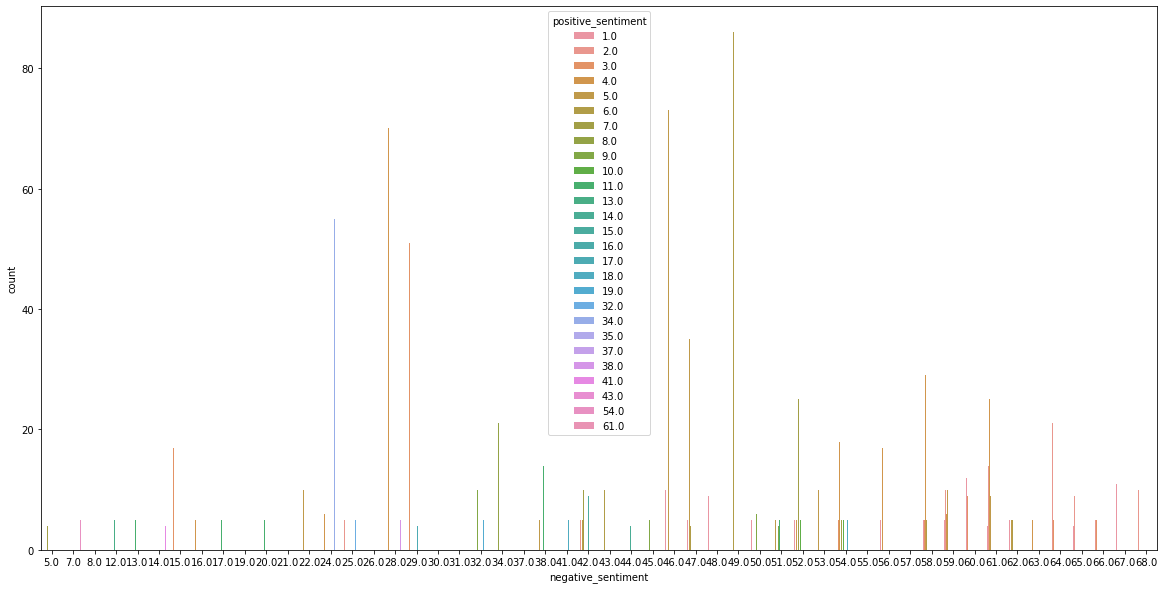

In [16]:
sns.countplot(x="negative_sentiment",hue="positive_sentiment",data=test)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


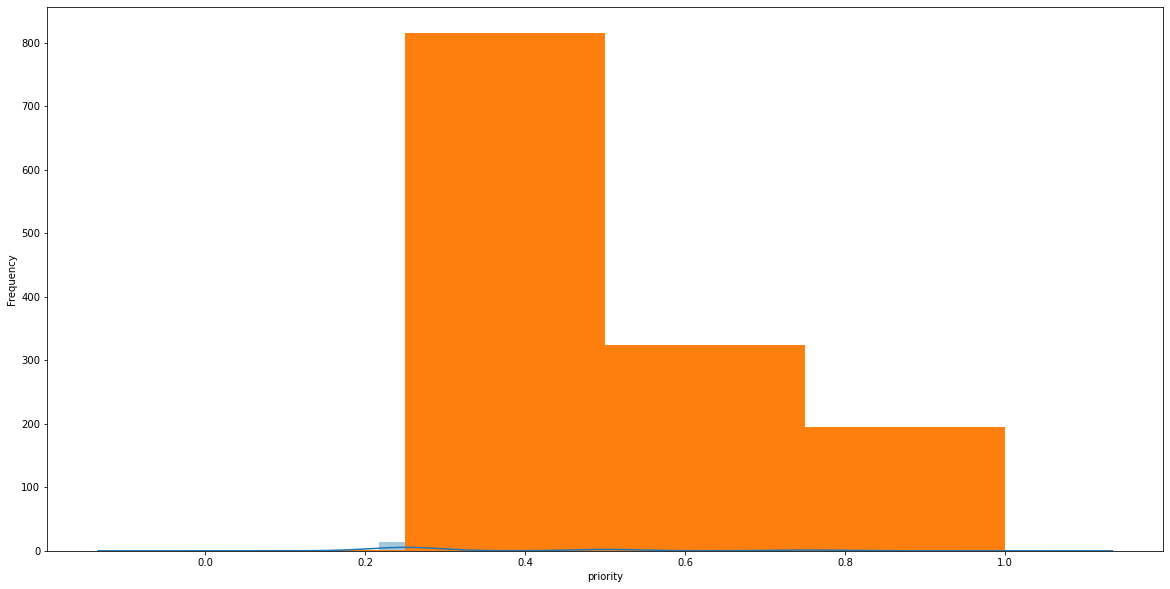

In [21]:
sns.distplot(train["priority"].dropna())
train["priority"].plot.hist(bins=4)


In [ ]:
## github.com/y3ksolver/LogicalRegression

In [28]:
X = test.drop("positive_sentiment", axis=1)
y = test["positive_sentiment"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)


LogisticRegression()

In [29]:
predictions = logmodel.predict(X_test)


In [34]:
print(classification_report(y_test,predictions))



              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        35
         2.0       0.00      0.00      0.00        29
         3.0       0.00      0.00      0.00        36
         4.0       0.17      1.00      0.30        75
         5.0       0.00      0.00      0.00        76
         6.0       0.00      0.00      0.00        42
         7.0       0.00      0.00      0.00        30
         8.0       0.00      0.00      0.00        29
         9.0       0.00      0.00      0.00        14
        10.0       0.00      0.00      0.00         5
        11.0       0.00      0.00      0.00         9
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         2
        15.0       0.00      0.00      0.00         3
        16.0       0.00      0.00      0.00         5
        17.0       0.00      0.00      0.00         2
        18.0       0.00      0.00      0.00         5
        19.0       0.00    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
confusion_matrix(y_test,predictions)



array([[ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 75,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 76,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0, 